In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lzKzirPmtKcnTEds2XZ6")
project = rf.workspace("habib-4w1hy").project("ocean-dataset-wm2wt")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ocean-Dataset-3 in yolov8:: 100%|██████████| 262/262 [00:00<00:00, 8177.00it/s]


In [ ]:
print(f"Dataset information: {dataset.location}")


Dataset information: /content/Ocean-Dataset-3


In [ ]:
import yaml

# Path to the data.yaml file
data_yaml_path = f"{dataset.location}/data.yaml"

# Read the contents of the data.yaml file
with open(data_yaml_path, 'r') as f:
    data_yaml_content = yaml.safe_load(f)

# Print the content, which includes the splits
print("Data splits information from data.yaml:")
print(data_yaml_content)

Data splits information from data.yaml:
{'names': ['Australian Mado', 'Beau Gregory Damselfish', 'Bluestriped Goatfish', 'Burrito Grunt', 'Monkfish', 'Narrowband Sergeant Major', 'Sergeant Major', 'Silver Batfish'], 'nc': 8, 'roboflow': {'license': 'MIT', 'project': 'ocean-dataset-wm2wt', 'url': 'https://universe.roboflow.com/habib-4w1hy/ocean-dataset-wm2wt/dataset/3', 'version': 3, 'workspace': 'habib-4w1hy'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


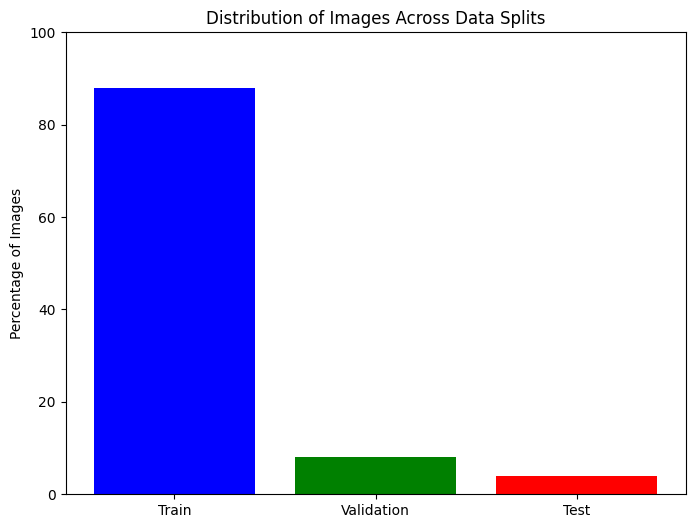

In [ ]:
import os
import matplotlib.pyplot as plt
import yaml

# Ensure data_yaml_content and dataset.location are available
if 'data_yaml_content' not in locals() or 'dataset' not in locals():
    print("Please run the cells to load the dataset and data.yaml first.")
else:
    # Get the paths to the train, validation, and test directories from the loaded data_yaml_content
    train_dir = os.path.join(dataset.location, data_yaml_content['train'].replace('../', ''))
    val_dir = os.path.join(dataset.location, data_yaml_content['val'].replace('../', ''))
    test_dir = os.path.join(dataset.location, data_yaml_content['test'].replace('../', ''))

    # Count the number of images in each directory
    num_train_images = len([f for f in os.listdir(train_dir) if f.endswith('.jpg') or f.endswith('.png')])
    num_val_images = len([f for f in os.listdir(val_dir) if f.endswith('.jpg') or f.endswith('.png')])
    num_test_images = len([f for f in os.listdir(test_dir) if f.endswith('.jpg') or f.endswith('.png')])

    # Calculate the total number of images
    total_images = num_train_images + num_val_images + num_test_images

    # Data for plotting
    split_names = ['Train', 'Validation', 'Test']
    split_percentages = [num_train_images / total_images * 100,
                         num_val_images / total_images * 100,
                         num_test_images / total_images * 100]

    # Create the bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(split_names, split_percentages, color=['blue', 'green', 'red'])
    plt.ylabel('Percentage of Images')
    plt.title('Distribution of Images Across Data Splits')
    plt.ylim(0, 100) # Ensure y-axis goes up to 100%
    plt.show()

Loading image from: /content/Ocean-Dataset-3/train/images/robert-rivertobay_com_au-210_jpg.rf.0927e281168ac5bc0cd2856a48cb834f.jpg
Original image dimensions: 640x640
Resizing image to: 640x640
Converting image to grayscale.
Applying a 90-degree rotation (example of orientation change).


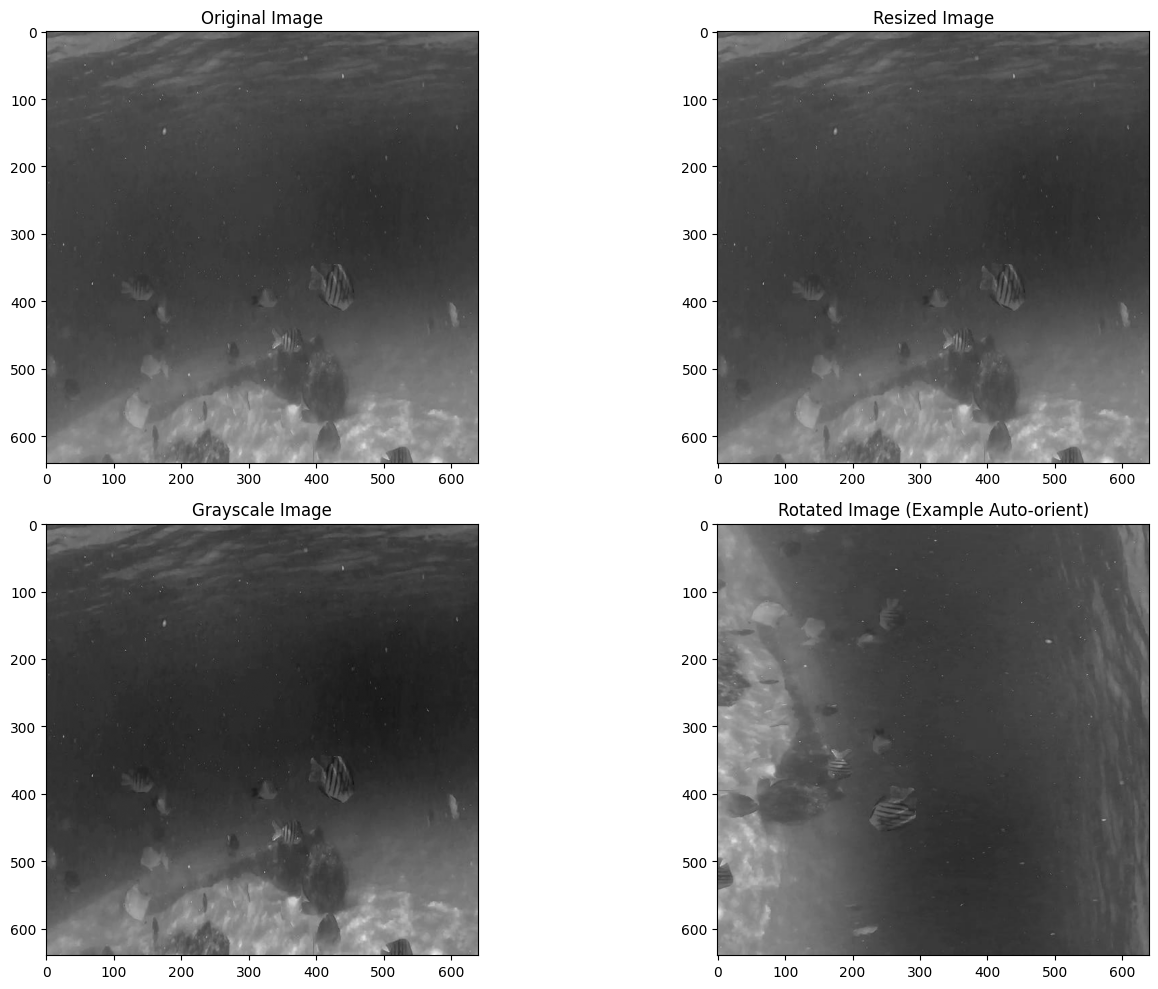

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Assuming the dataset is downloaded and located at dataset.location
# Let's pick a sample image from the training set

# Construct the path to a sample image
# We need to make sure train directory path is correctly constructed
train_dir = os.path.join(dataset.location, data_yaml_content['train'].replace('../', ''))
sample_image_path = None
# Find the first image file in the train directory
for f in os.listdir(train_dir):
    if f.endswith('.jpg') or f.endswith('.png'):
        sample_image_path = os.path.join(train_dir, f)
        break

if sample_image_path:
    # Step 1: Load the image
    print(f"Loading image from: {sample_image_path}")
    img = cv2.imread(sample_image_path)

    # Check if the image was loaded successfully
    if img is not None:
        # Get the original dimensions
        original_height, original_width = img.shape[:2]
        print(f"Original image dimensions: {original_width}x{original_height}")

        # Step 2: Resize the image
        target_width = 640
        target_height = 640
        print(f"Resizing image to: {target_width}x{target_height}")
        resized_img = cv2.resize(img, (target_width, target_height))

        # Step 3: Convert to grayscale
        print("Converting image to grayscale.")
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


        # Step 4: Auto-orient (conceptual example using rotation)
        # True auto-orientation requires reading EXIF data, which is not directly
        # handled by cv2.imread. This is a simplified example using rotation.
        print("Applying a 90-degree rotation (example of orientation change).")
        rotated_img = cv2.rotate(resized_img, cv2.ROTATE_90_CLOCKWISE)


        # Display the original, resized, grayscale, and rotated images
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")

        plt.subplot(2, 2, 2)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.title("Resized Image")

        plt.subplot(2, 2, 3)
        plt.imshow(gray_img, cmap='gray') # Use cmap='gray' for grayscale images
        plt.title("Grayscale Image")

        plt.subplot(2, 2, 4)
        plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
        plt.title("Rotated Image (Example Auto-orient)")

        plt.tight_layout()
        plt.show()

    else:
        print(f"Error: Could not load image from {sample_image_path}")
else:
    print(f"No image files found in the training directory: {train_dir}")

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 41.6MB/s]
New https://pypi.org/project/ultralytics/8.3.203 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Ocean-Dataset-3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=F

/content


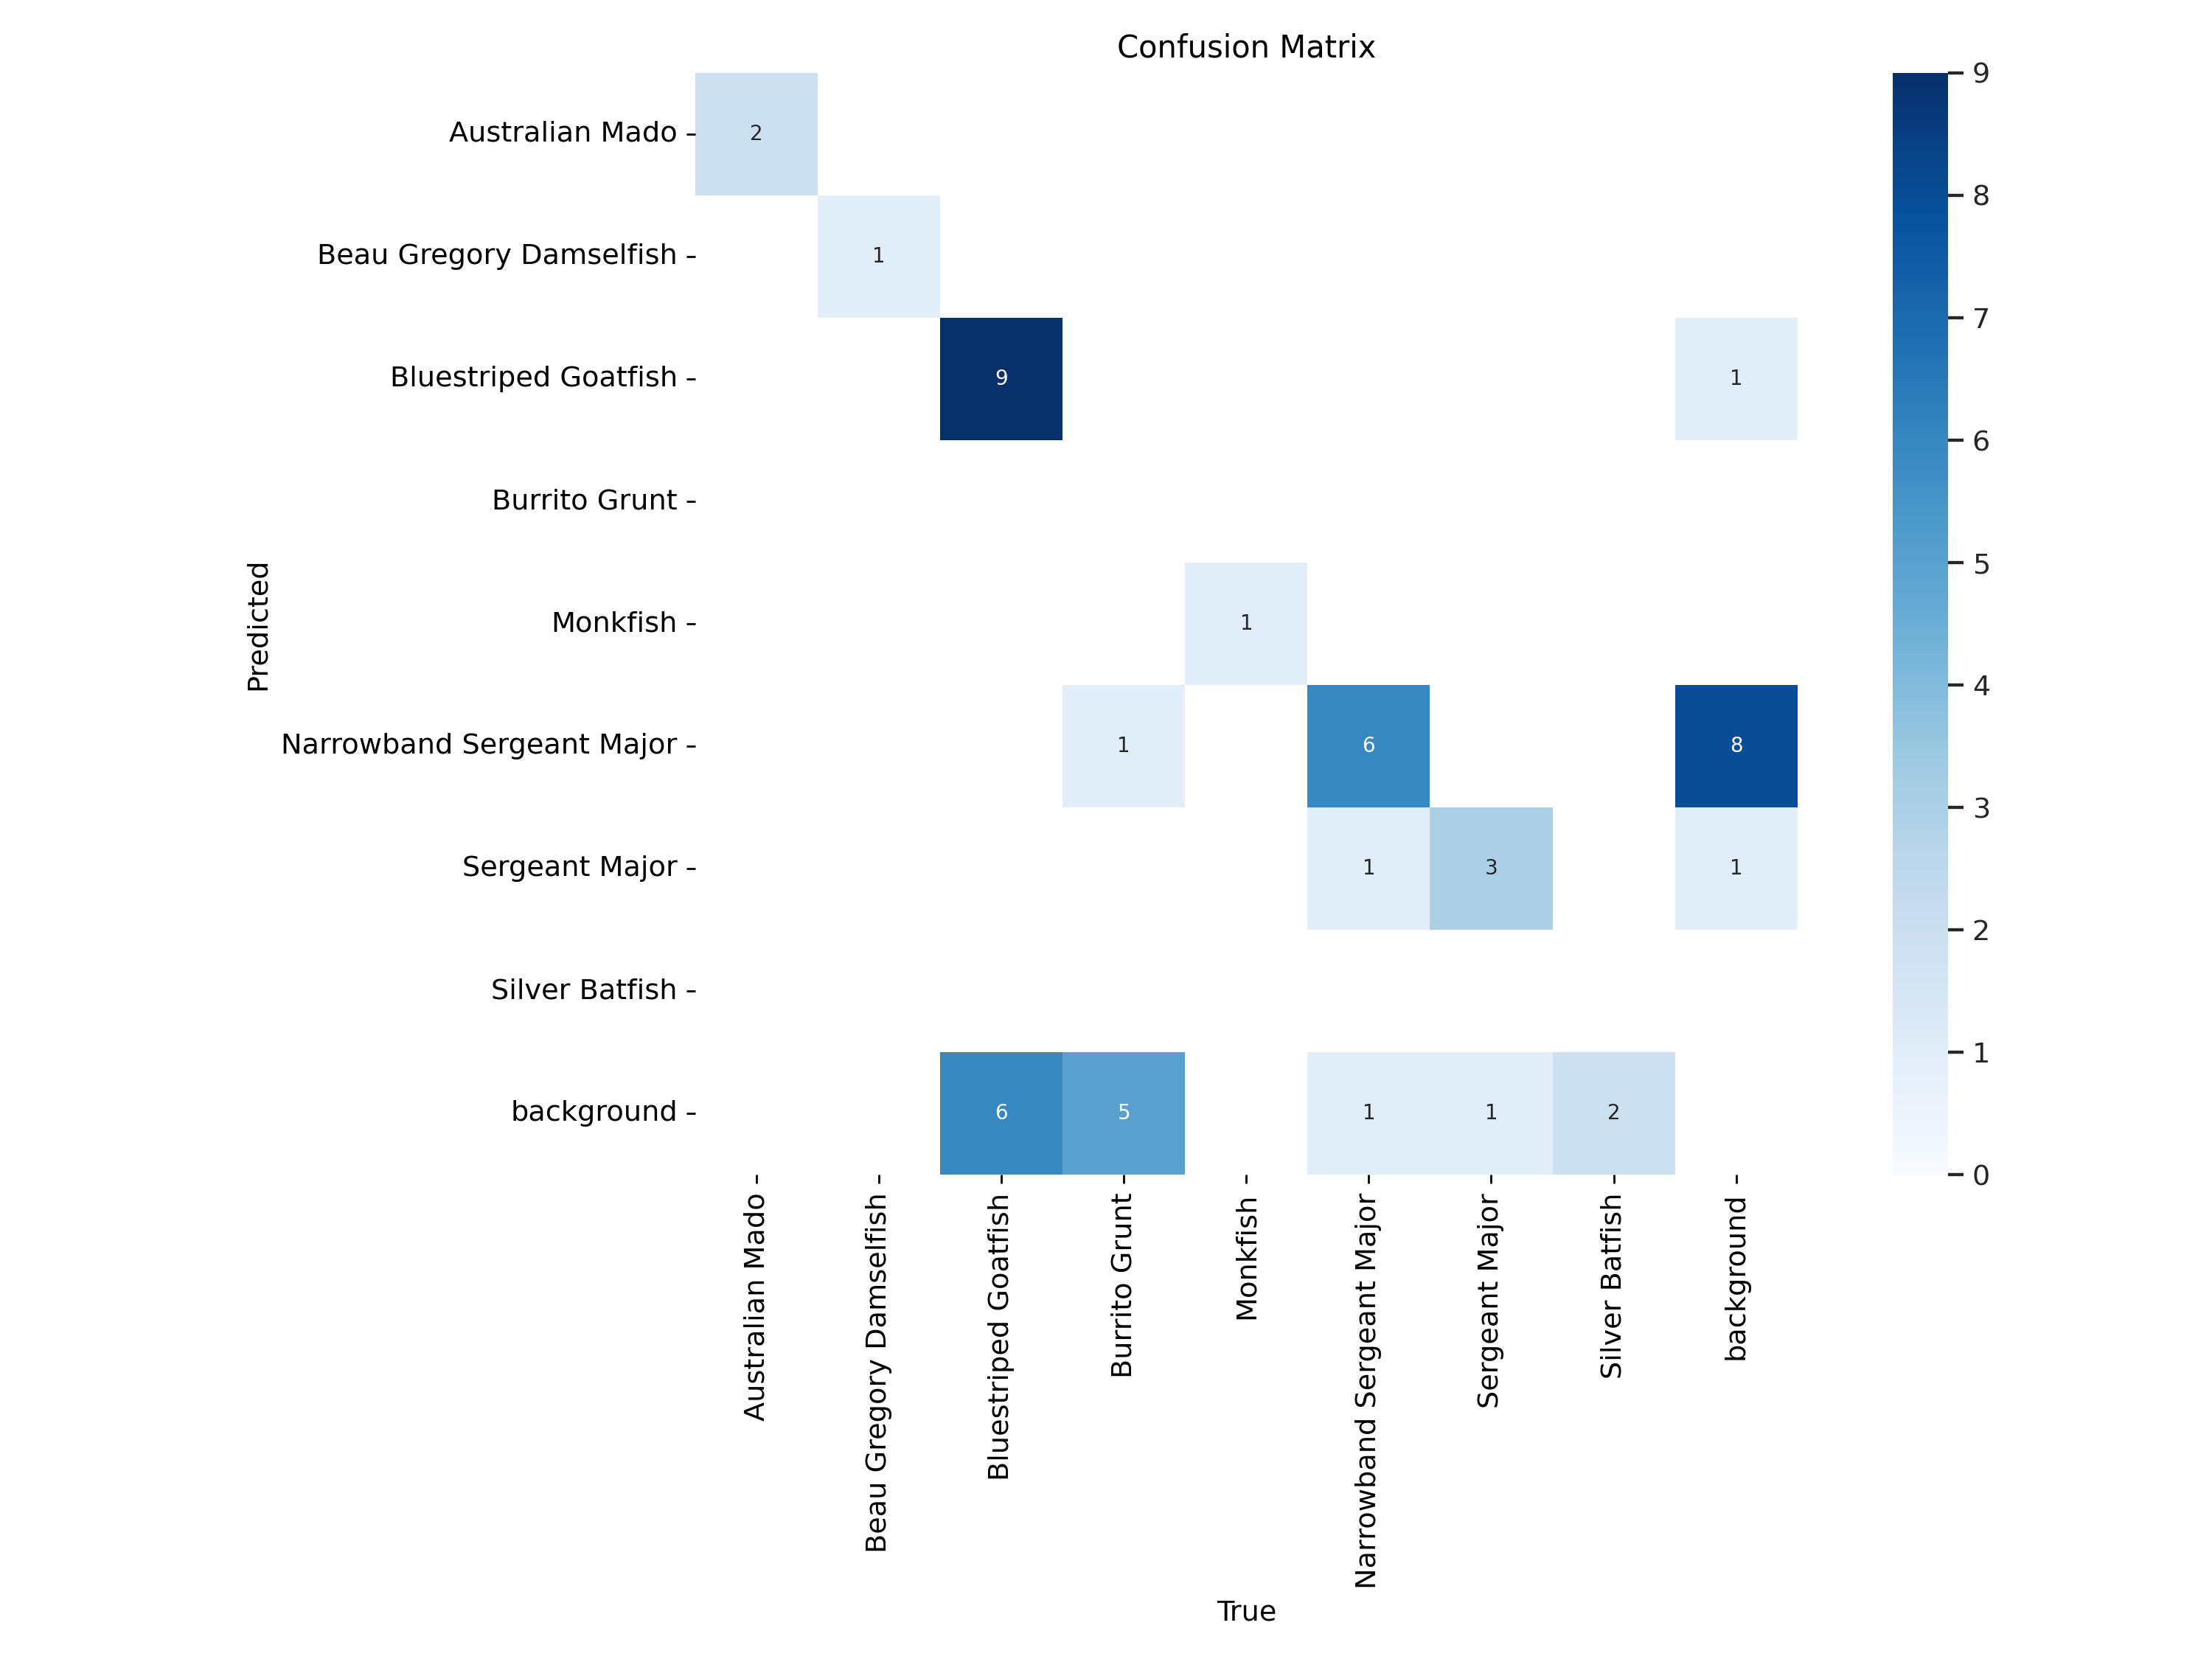

In [ ]:
HOME = '/content'
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


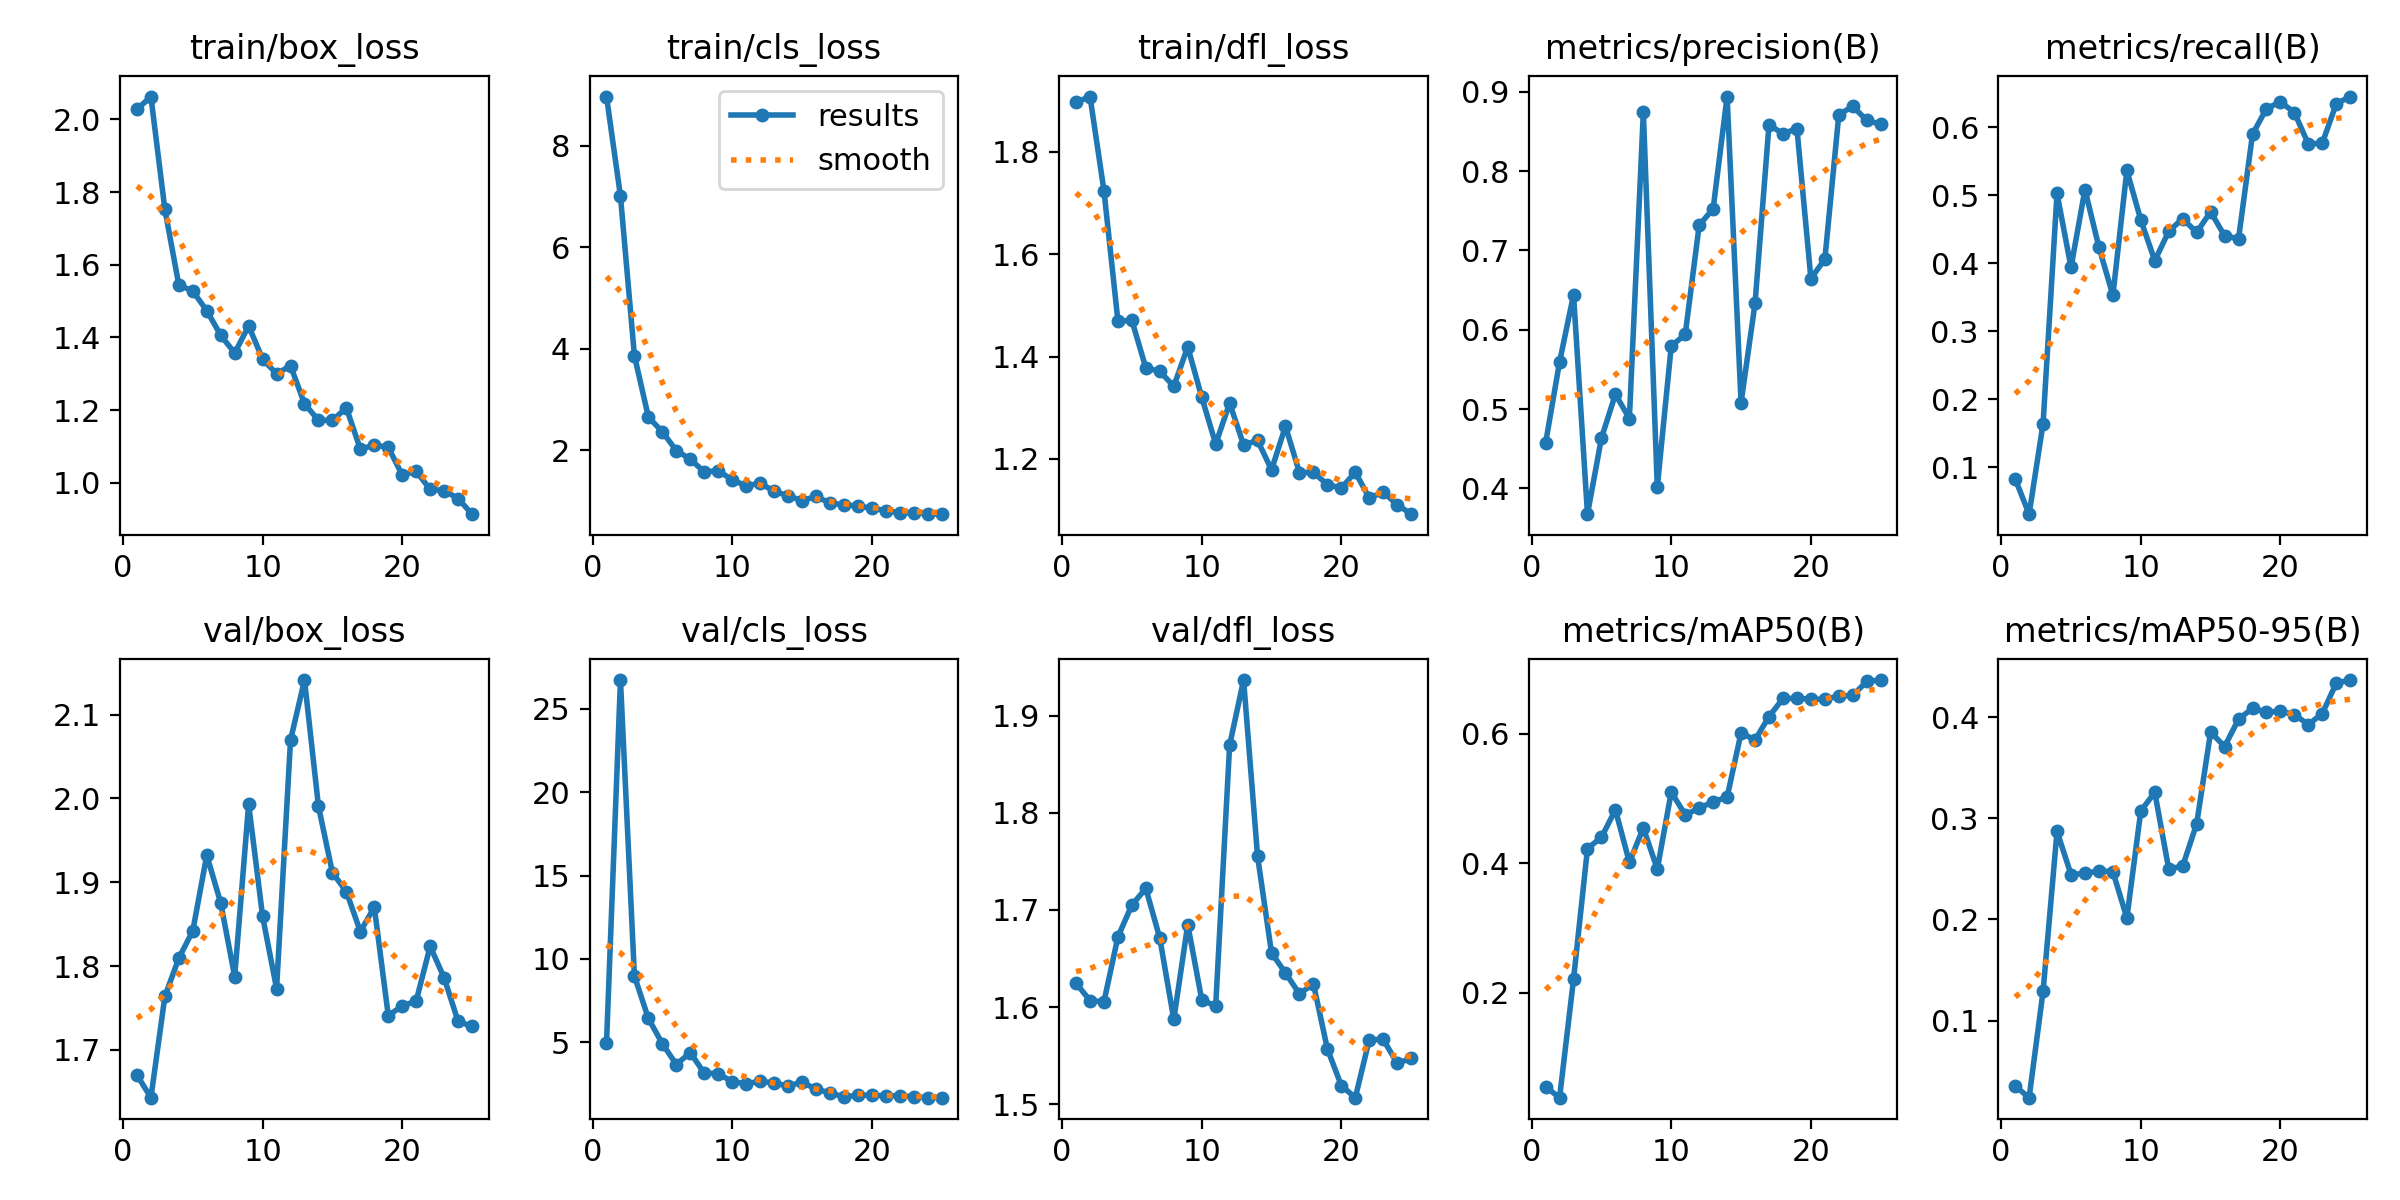

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


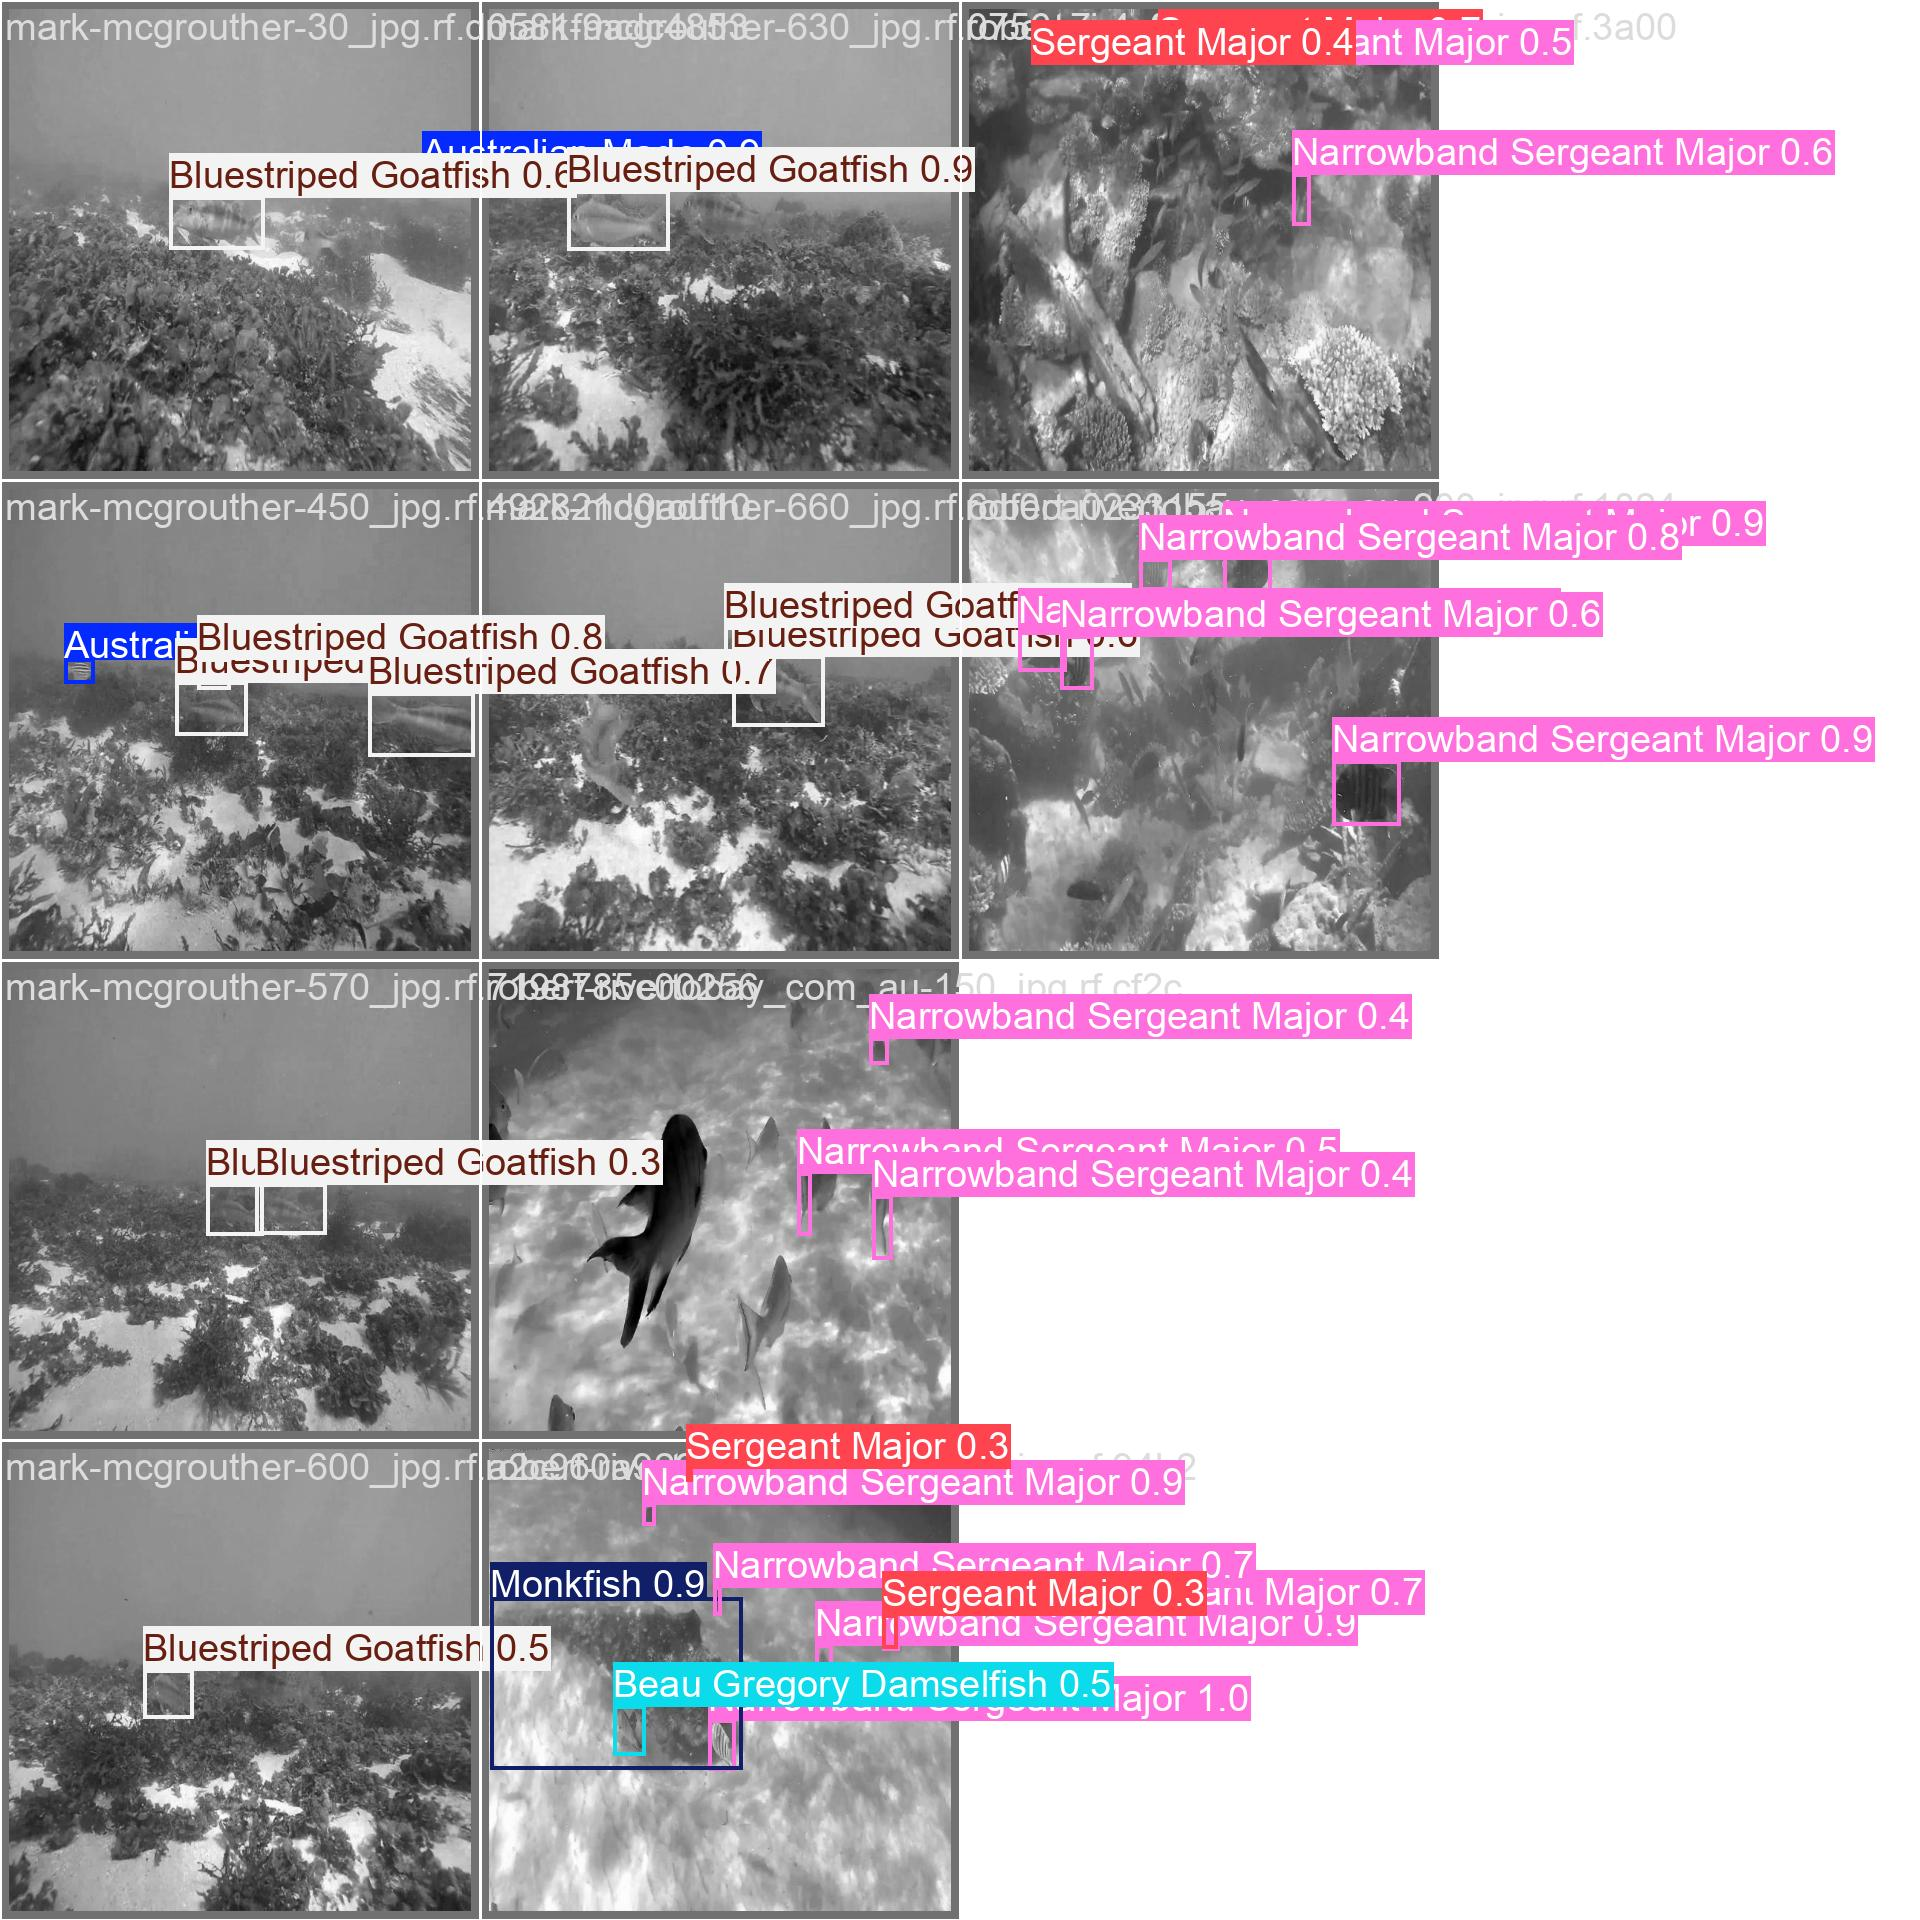

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)


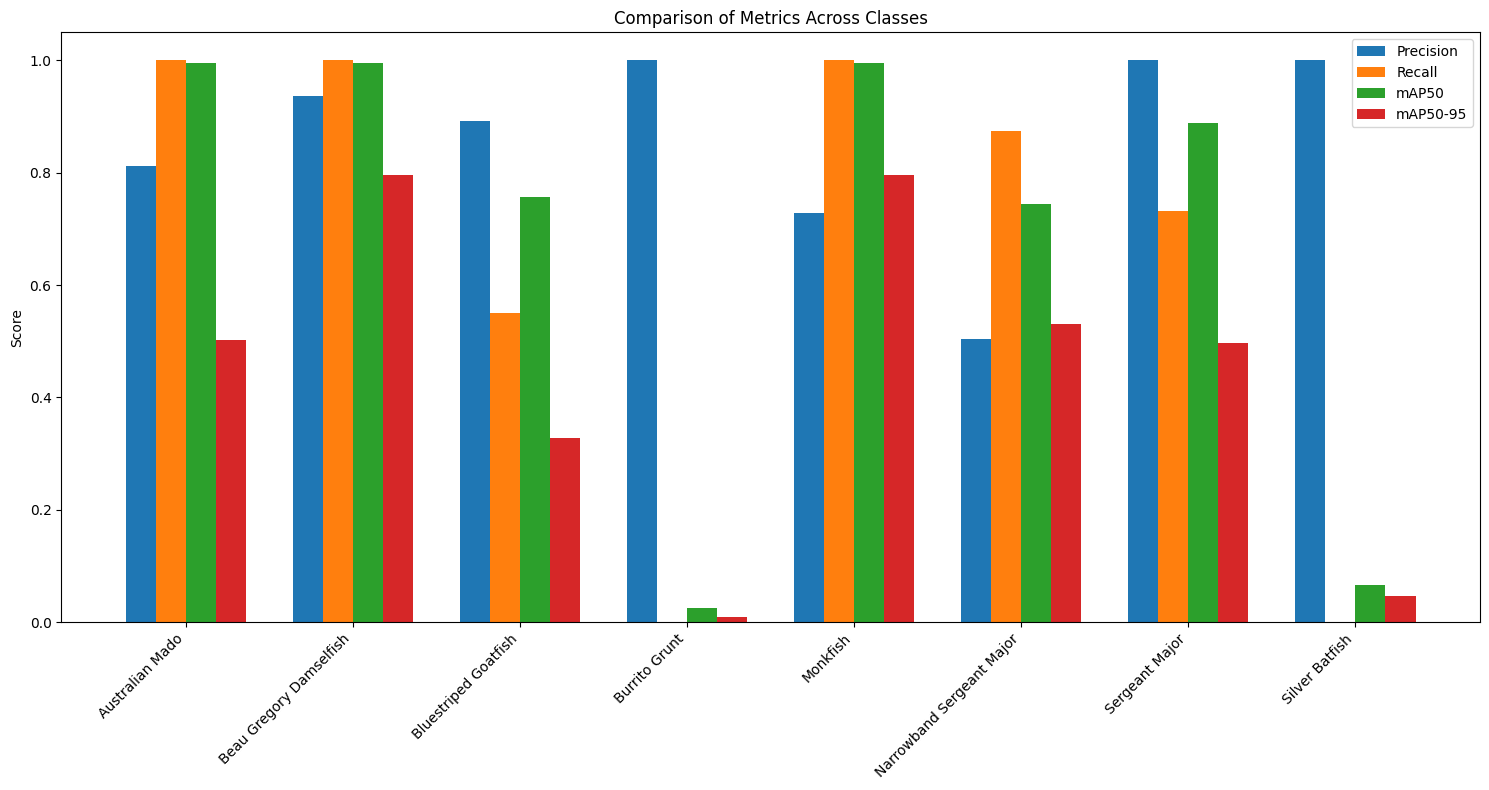

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the output of cell AJuWLVlt2M8y
class_metrics = {
    'all': {'P': 0.859, 'R': 0.645, 'mAP50': 0.683, 'mAP50-95': 0.438},
    'Australian Mado': {'P': 0.812, 'R': 1, 'mAP50': 0.995, 'mAP50-95': 0.502},
    'Beau Gregory Damselfish': {'P': 0.936, 'R': 1, 'mAP50': 0.995, 'mAP50-95': 0.796},
    'Bluestriped Goatfish': {'P': 0.892, 'R': 0.55, 'mAP50': 0.756, 'mAP50-95': 0.328},
    'Burrito Grunt': {'P': 1, 'R': 0, 'mAP50': 0.0244, 'mAP50-95': 0.00974},
    'Monkfish': {'P': 0.729, 'R': 1, 'mAP50': 0.995, 'mAP50-95': 0.796},
    'Narrowband Sergeant Major': {'P': 0.504, 'R': 0.875, 'mAP50': 0.745, 'mAP50-95': 0.53},
    'Sergeant Major': {'P': 1, 'R': 0.731, 'mAP50': 0.888, 'mAP50-95': 0.497},
    'Silver Batfish': {'P': 1, 'R': 0, 'mAP50': 0.0655, 'mAP50-95': 0.0458}
}

# Remove 'all' from the classes to plot individual class metrics
classes = list(class_metrics.keys())
classes.remove('all')

metrics = ['P', 'R', 'mAP50', 'mAP50-95']
metric_labels = ['Precision', 'Recall', 'mAP50', 'mAP50-95']

x = np.arange(len(classes)) # the label locations
width = 0.18 # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))

for i, metric in enumerate(metrics):
    values = [class_metrics[cls][metric] for cls in classes]
    rects = ax.bar(x + i * width, values, width, label=metric_labels[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics Across Classes')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(classes, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Ocean-Dataset-3/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.34it/s]
                   all         10         39      0.859      0.645      0.683      0.438
       Australian Mado          2          2      0.812          1      0.995      0.502
Beau Gregory Damselfish          1          1      0.936          1      0.995      0.796
  Bluestriped Goatfish          6         15      0.892       0.55      0.756      0.328
         Burrito Grunt          1          6          1          0     0.0244    0.00974
              Monkfish          1          1      0.729          1      0.995      0.796
Narrowband Sergeant Major          

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

image 1/5 /content/Ocean-Dataset-3/test/images/mark-mcgrouther-120_jpg.rf.112a2c5c717139f3c3e181daef0a2c3b.jpg: 800x800 1 Bluestriped Goatfish, 22.3ms
image 2/5 /content/Ocean-Dataset-3/test/images/robert-rivertobay_com_au-120_jpg.rf.fc95b240cc77bd9e035f3e0aa2e70a1a.jpg: 800x800 5 Narrowband Sergeant Majors, 1 Silver Batfish, 22.3ms
image 3/5 /content/Ocean-Dataset-3/test/images/robert-rivertobay_com_au-180_jpg.rf.f5eee22cb00145029514fd419bcea427.jpg: 800x800 4 Narrowband Sergeant Majors, 4 Silver Batfishs, 22.4ms
image 4/5 /content/Ocean-Dataset-3/test/images/robert-rivertobay_com_au-690_jpg.rf.2dbaa023e312901ded1f8f9313f96a68.jpg: 800x800 2 Narrowband Sergeant Majors, 1 Silver Batfish, 22.4ms
image 5/5 /content/Ocean-Dataset-3/test/images/robert-rivertobay_com_au-90_jpg.rf.1c68c3416a3727a7e914883d24bc76a2.

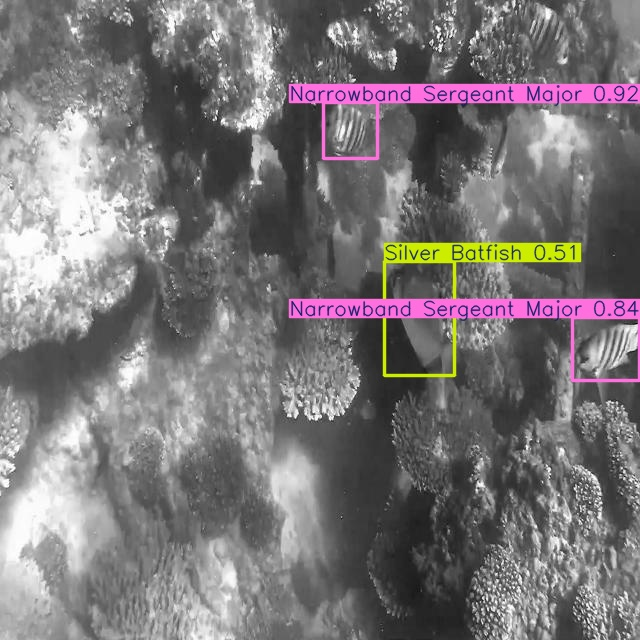

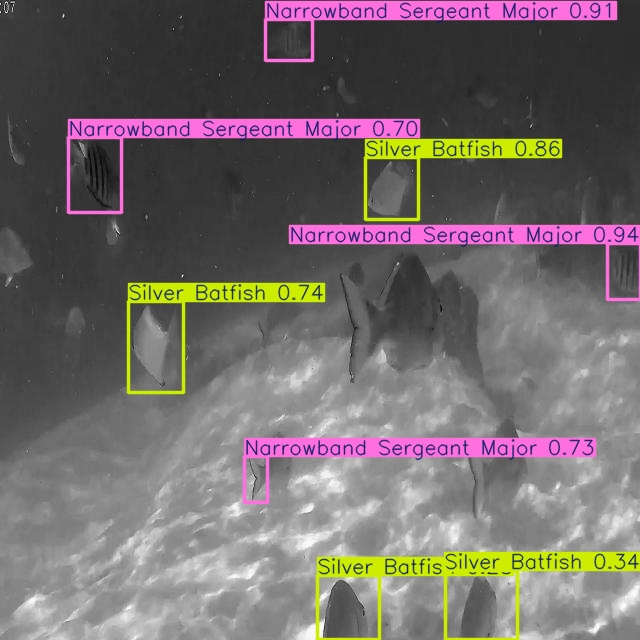

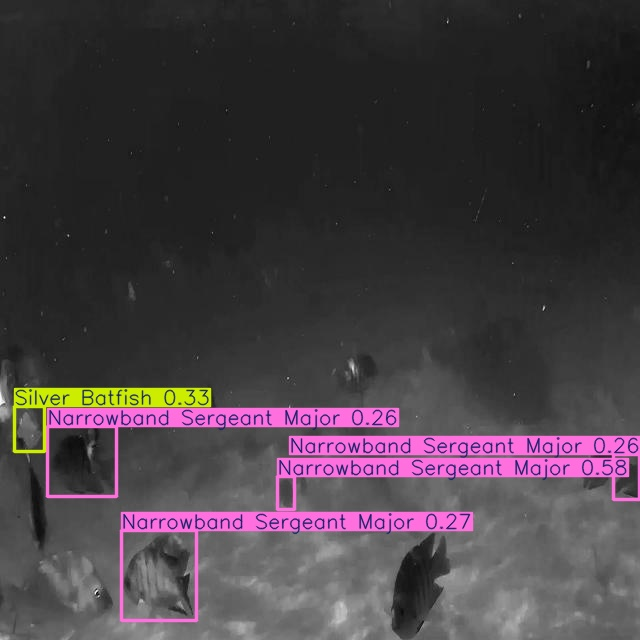

In [ ]:
import glob
from IPython.display import Image, display
import os

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")